## 2 задача:

Случайная величина имеет экспоненциальный закон распределения

\begin{equation*}
𝑝(𝑥) = \begin{cases}
𝑒^{-𝑥} & x\geq0 \\
0 & x<0
\end{cases}
\end{equation*}

Сгенерируйте выборку объема 𝑛 = 25.


In [40]:
n = 25

а) Определить по выборке моду, медиану, размах, оценку коэффициента
асимметрии.

b) Построить эмпирическую функцию распределения, гистограмму и
boxplot.


d)Определить плотность распределения среднего арифметического элементов выборки. Сравнить с бутстраповской оценкой плотности.

e) Найти бутстраповскую оценку плотности распределения коэффициента асимметрии.

f) Найти плотность распределения медианы выборки и сравнить с bootstrap.

In [23]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

Генерируем выборку 𝑛 = 25


In [13]:
sample = np.random.exponential(size=n)

Вариационный ряд:

In [61]:
sort_sample = np.sort(sample)
sort_sample

array([0.00604652, 0.02539255, 0.05274491, 0.09683033, 0.11376825,
       0.18738958, 0.23989575, 0.25426338, 0.27742048, 0.31353565,
       0.31834958, 0.48278004, 0.60649277, 0.67485637, 0.83727238,
       0.99783484, 1.05538638, 1.36783483, 1.55974683, 1.61031635,
       2.06822979, 2.21876849, 2.25670005, 2.8369163 , 2.96526846])

# а) Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии.

Мода: элементы выборки, которые встречаются чаще всего

In [29]:
mode = statistics.multimode(sample)
mode

[2.218768492059553,
 0.6748563701602059,
 0.05274491483422815,
 0.006046519941114823,
 0.025392545293980953,
 1.5597468332966884,
 1.367834831115012,
 2.836916297078405,
 0.2542633754882718,
 2.965268462539049,
 0.31834958134886454,
 1.0553863769154066,
 0.11376824662835174,
 0.4827800391930822,
 2.256700053793949,
 0.9978348396965471,
 1.6103163502626647,
 0.8372723799589198,
 0.09683033430352958,
 2.0682297921178887,
 0.31353565187809823,
 0.2774204811774151,
 0.23989574597830574,
 0.1873895816832044,
 0.60649277444272]

Медиана:

\begin{equation}
𝑚𝑒𝑑 = \begin{cases}
𝑥_{(k+1)} & 𝑛=2𝑘+1 \\
\frac{x_{(k)}+x_{(k+1)}}{2} & 𝑛=2𝑘
\end{cases}
\end{equation}

In [30]:
med = statistics.median(sample)
med

0.60649277444272

Размах:

$l=x_{max}-x_{min}$

In [32]:
l = sample.max() - sample.min()
l

2.9592219425979343

Коеффициент ассимметрии:

In [28]:
assymetry = stats.skew(sample)
assymetry

0.8830583509470091

# b) Построить эмпирическую функцию распределения, гистограмму и boxplot.

Эмпирическая функция распределения:

𝐹 = 𝑃 (ξ < x) = 𝑃(𝐴)

<Axes: ylabel='Proportion'>

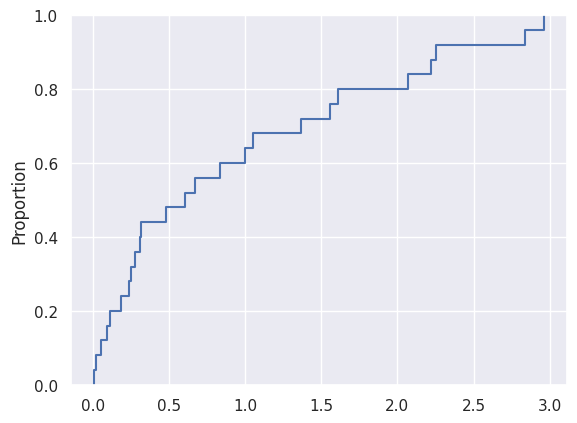

In [33]:
fig, ax = plt.subplots()
sns.ecdfplot(x=sample, ax=ax)

Гистограмма: статистический ряд

<Axes: ylabel='Count'>

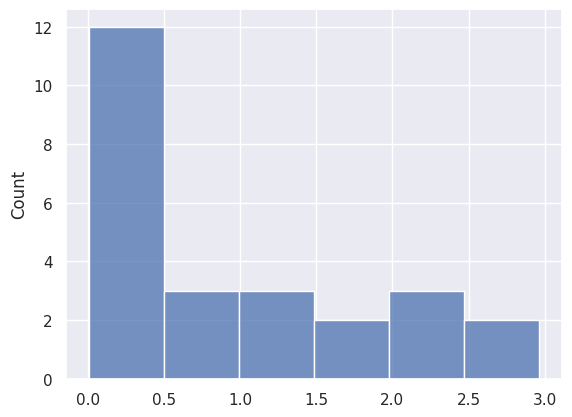

In [34]:
sns.histplot(x=sample)

Boxplot:

<Axes: >

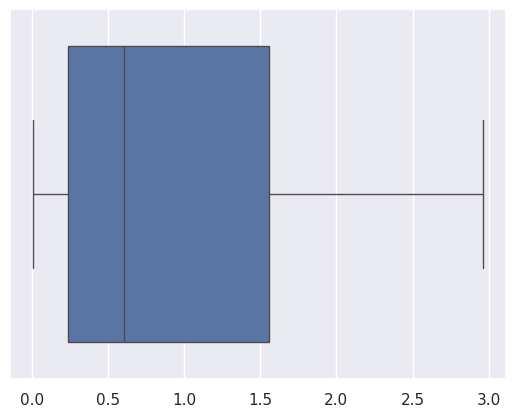

In [37]:
sns.boxplot(x=sample)

# Bootstrap 1000

In [57]:
num = 1000

In [58]:
bootstrap_sample = np.array([np.random.choice(sample, n) for _ in range(num)])

# d)Определить плотность распределения среднего арифметического элементов выборки. Сравнить с бутстраповской оценкой плотности.

Рассчеты в pdf: N(1, 1/25)

In [59]:
def avg_density(x):
    return 5 / np.sqrt(2 * np.pi) * np.exp(-0.5 * ((x - 1) / 0.2) ** 2)

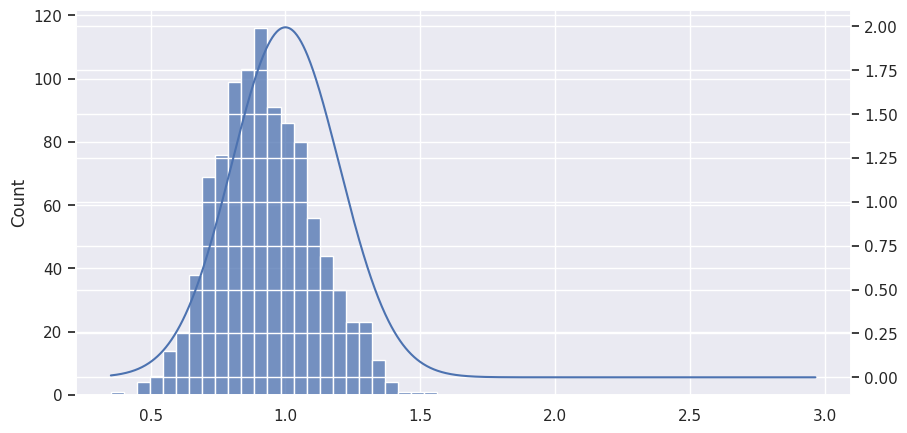

In [60]:
bootstrap_sample_avg = np.array([np.average(array) for array in bootstrap_sample])

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot()
ax2 = ax1.twinx()

x = np.linspace(np.min(bootstrap_sample_avg), np.max(bootstrap_sample), num)
y = avg_density(x)

sns.histplot(x=bootstrap_sample_avg, ax=ax1)
sns.lineplot(x=x, y=y, ax=ax2)

plt.show()

# e) Найти бутстраповскую оценку плотности распределения коэффициента асимметрии.

<Axes: ylabel='Count'>

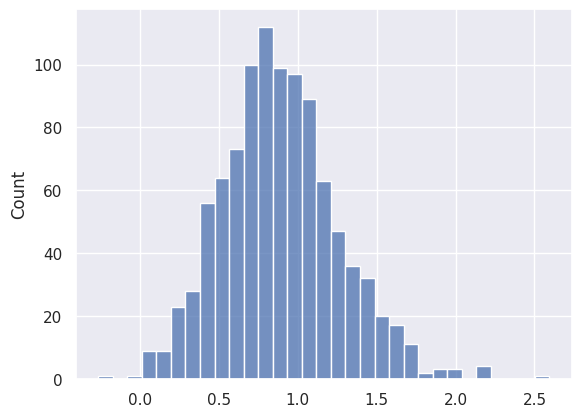

In [65]:
bootstrap_sample_skews = np.array([stats.skew(array) for array in bootstrap_sample])
sns.histplot(x=bootstrap_sample_skews)

# f) Найти плотность распределения медианы выборки и сравнить с bootstrap.

In [66]:
def med_density(x):
    return 25 * (1 - np.exp(-x)) ** 12 * (np.exp(-x)) ** 13

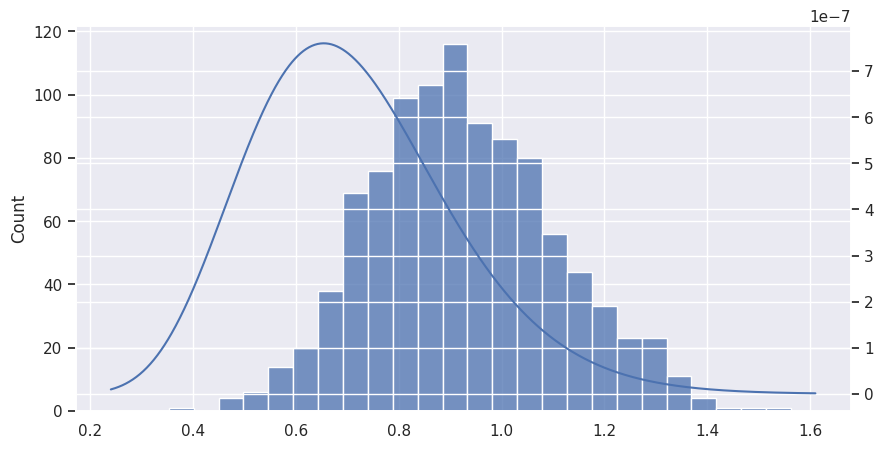

In [72]:
bootstrap_sample_med = np.array([np.median(array) for array in bootstrap_sample])

fig_s = plt.figure(figsize=(10, 5))
ax1_s = fig_s.add_subplot(111)
ax2_s = ax1_s.twinx()

x = np.linspace(np.min(bootstrap_sample_med), np.max(bootstrap_sample_med), 1000)
y = med_density(x)

sns.histplot(x=bootstrap_sample_avg, ax=ax1_s)
sns.lineplot(x=x, y=y, ax=ax2_s)

plt.show()